# Projeto Semantix

Este é o projeto de parceria com a Semantix, realizado no curso de Ciência de Dados da EBAC.

Neste projeto iremos seguir os passos da metodologia Crisp - DM com a base de dados a ser apresentado, estes passos consistem em:

- Entendimento do negócio
- Entendimento da base de dados
- Preparação da base de dados
- Modelagem
- Avaliação do Modelo
- Implementação

### Bibliotecas utilizadas

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from imblearn.over_sampling import RandomOverSampler

##1. Entendimento do negócio

Suponhamos que uma empresa que oferece seguros de saúde esteja planejando ampliar seus negócios, oferecendo também seguros automotivos. Para isso, é interessante que essa empresa saiba de antemão se seus clientes têm intenção de adquirir tal seguro, para ter certeza se tal ação é economicamente viável. Para isso, devemos criar um modelo capaz de prever quais clientes possuem tal intenção a partir das informações que possuímos nesta base de dados.

##2. Levantamento dos dados

As bases de dados utilizadas neste projeto foram obtidas no Kaggle, sendo ambas disponíveis neste [link](https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction?select=train.csv).

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [143]:
df = pd.read_csv('train.csv')
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [144]:
df.shape

(381109, 12)

- Aqui temos uma explicação básica sobre o significado das variáveis:

| **Variable**            | **Definition**                                                                                      |
|-------------------------|-----------------------------------------------------------------------------------------------------|
| `id`                    | ID único do cliente                                                                          |
| `Gender`                | Gênero do cliente                                                         |
| `Age`                   | Idade do cliente                                                            |
| `Driving_License`        | 0 : Cliente não possui habilitação para dirigir, 1 : Cliente possui habilitação                                          |
| `Region_Code`           | Código único para a região onde o cliente mora                                                          |
| `Previously_Insured`     | 1 : Cliente já possui seguro veicular, 0 : Cliente não possui seguro             |
| `Vehicle_Age`           | Idade do veículo                                                                                  |
| `Vehicle_Damage`        | 1 : Cliente já teve seu veículo danificado no passado, 0 : Cliente nunca teve seu veículo danificado|
| `Annual_Premium`        | Quantia que o cliente deve pagar anualmente                                              |
| `Policy_Sales_Channel`   | Código anônimo para contactar o cliente |
| `Vintage`               | Número de dias que o cliente esteve associado com a companhia                                        |
| `Response`              | 1 : Cliente está interessado, 0 : Cliente não está interessado                                           |

- Abaixo iremos fazer mais análise sobre a base de dados, como o tipo de cada variável, alguns números importantes sobre elas e também a quantidade de nulos nela.


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [146]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [147]:
df.isna().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


### Agora que já fizemos estas análises prévias, podemos prosseguir para alguns passos mais refinados.

- Iremos fazer uma análise univariada de algumas variáveis importantes na base de dados, iremos primeiramente ver apenas os clientes cuja variável resposta "Response" é verdadeira.
- Para isso, iremos primeiramente separar apenas as linhas onde a variável resposta é 1.

In [148]:
response_true = df.loc[df['Response'] == 1]
response_true.shape

(46710, 12)

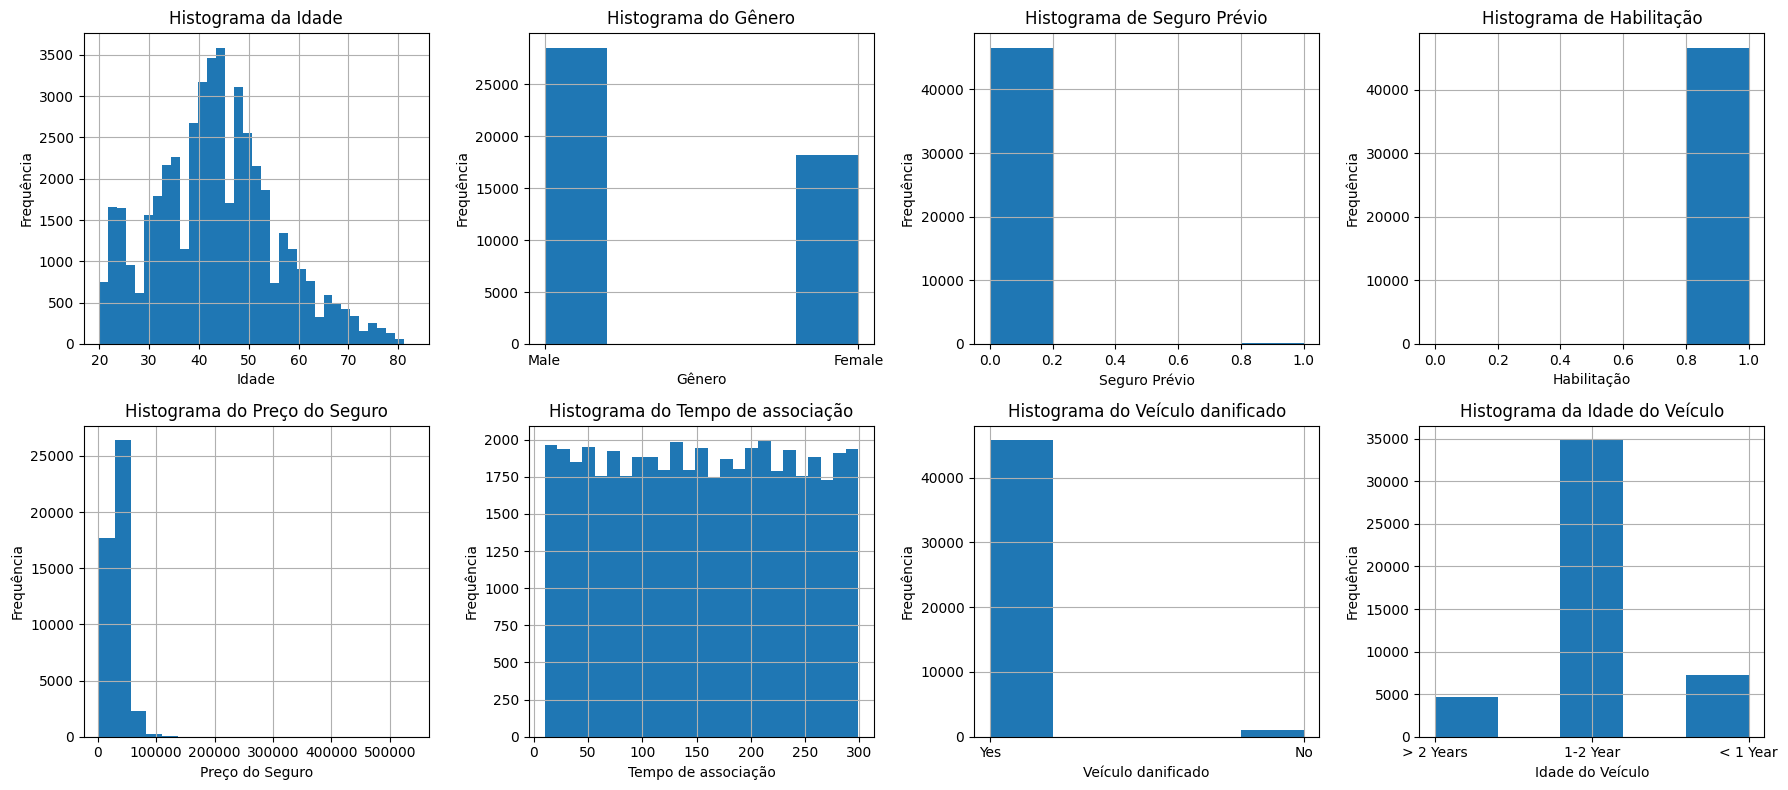

In [9]:
fig, axs = plt.subplots(2,4, figsize=(18, 8))

response_true['Age'].hist(bins=35, ax=axs[0, 0])
axs[0,0].set_title('Histograma da Idade')
axs[0, 0].set_xlabel('Idade')
axs[0, 0].set_ylabel('Frequência')


response_true['Gender'].hist(bins = 5, ax = axs[0, 1])
axs[0,1].set_title('Histograma do Gênero')
axs[0, 1].set_xlabel('Gênero')
axs[0, 1].set_ylabel('Frequência')

response_true['Previously_Insured'].hist(bins = 5, ax = axs[0, 2])
axs[0,2].set_title('Histograma de Seguro Prévio')
axs[0, 2].set_xlabel('Seguro Prévio')
axs[0, 2].set_ylabel('Frequência')

response_true['Driving_License'].hist(bins = 5, ax = axs[0, 3])
axs[0,3].set_title('Histograma de Habilitação')
axs[0, 3].set_xlabel('Habilitação')
axs[0, 3].set_ylabel('Frequência')

response_true['Annual_Premium'].hist(bins = 20, ax = axs[1,0])
axs[1,0].set_title('Histograma do Preço do Seguro')
axs[1, 0].set_xlabel('Preço do Seguro')
axs[1, 0].set_ylabel('Frequência')

response_true['Vintage'].hist(bins = 25, ax= axs[1,1])
axs[1,1].set_title('Histograma do Tempo de associação')
axs[1, 1].set_xlabel('Tempo de associação')
axs[1, 1].set_ylabel('Frequência')

response_true['Vehicle_Damage'].hist(bins = 5, ax = axs[1,2])
axs[1,2].set_title('Histograma do Veículo danificado')
axs[1, 2].set_xlabel('Veículo danificado')
axs[1,2].set_ylabel('Frequência')

response_true['Vehicle_Age'].hist(bins = 5, ax = axs[1,3])
axs[1,3].set_title('Histograma da Idade do Veículo')
axs[1, 3].set_xlabel('Idade do Veículo')
axs[1, 3].set_ylabel('Frequência')

plt.subplots_adjust(hspace=0.8)
plt.tight_layout()

### A partir dos gráfico acimas podemos extrair diversos insights, dentre eles podemos citar:

- As pessoas mais dispostas a adquirir o seguro veicular estão na faixa etária entre 35 e 50 anos.
- A maioria destas pessoas são homens.
- Virtualmente todos aqueles dispostos a adquiri o seguro veicular são habilitados e não possuem seguro prévio.
- A enorme maioria das pessoas dispostas a adquirir o seguro pagam aproximadamente 50 mil anualmente, sendo que este número decresce grandemente para valores acima de 50 mil e, a partir dos 100 mil, fica praticamente insignificante.
- O tempo de associação não possui nenhuma ligação aparente com a disposição do cliente a adquirir um seguro veicular, sendo que este oscila de maneira quase aletória.
- A grande maioria das pessoas que estão disposta a adquirir o seguro já tiveram o veículo danificado antes, além disso, a maioria destes veículos têm entre 1 e 2 anos de fabricação.


Com essas informações podemos passar para a preparação da base de dados e a criação do modelo.

- Para a funcionamento correto do modelo, o primeiro passo será criar dummies para as variáveis não numéricas, este será o próximo passo, porém, antes disso, iremos exlcuir as variáveis 'Region_Code' e 'Policy_Sales_Channel', pois, além de não serem úteis na previsão, essas tratam de informações particulares de cada usuário.

In [32]:
def dummies(df, y=None):
    df = pd.get_dummies(df, columns=['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage'])
    return df

In [27]:
def x_y_split(df, y=None):
    X = df[['Gender_Male', 'Gender_Female', 'Age', 'Driving_License_1', 'Previously_Insured_1',
            'Vehicle_Age_< 1 Year', 'Vehicle_Age_1-2 Year', 'Vehicle_Age_> 2 Years', 'Vehicle_Damage_Yes',
            'Annual_Premium', 'Vintage']]
    y = df['Response'] if y is None else y
    return X, y

<Axes: xlabel='Response', ylabel='count'>

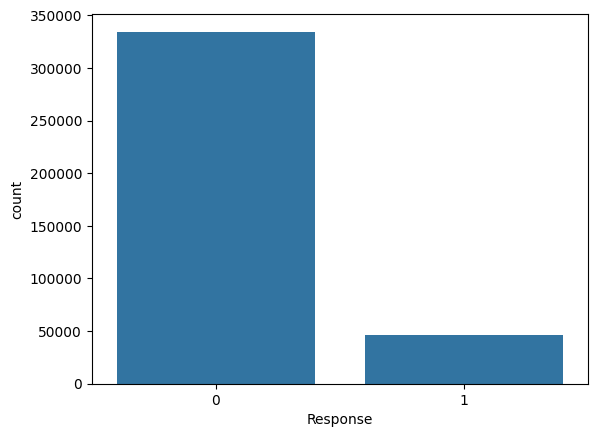

In [ ]:
sns.countplot(x='Response', data=df)

#### Antes de seguirmos para a criação do modelo, temos que tratar do problema mostrado acima, que ocorre com o fato de que existem muito mais linhas onde 'Response' é 0 do que 1, isso causa um desbalanceamento no treinamento do modelo, o que, por sua vez cria um modelo enviesado, para resolver isso, iremos bascicamente treinar o modelo em uma base onde a quantidade de 0 e 1 seja igual, existem duas maneiras de se fazer isso.

- Oversampling: Neste caso aumentamos o número de caso da classe minoritária (neste caso 'Response' sendo 1), assim ficamos com um conjuento de dados equilibrado.

- Undersampling: Justamente o oposto, diminuimos o número de casos da classe majoritária de modo a se obter um conjunto equilibrado.

Como neste projeto iremos criar e treinar um modelo específico para ele, overfitting não é um problema a se levar em consideração, além disso, não temos um conjunto de dados resposta para comparar com a previsão e medir a eficácia do modelo, logo, por este lado, podemos considerar que o overfitting é até uma 'vantagem', pois iremos assim, fazer as previsões com a maior precisão possível, por este mesmo motivo não iremos filtar variáveis com base em p-values, para que todas as variáveis que possam ser utilizadas entrem no modelo. Se somarmos isso ao fato do conjunto de dados não ser tão grande ao ponto do tempo dos calculos serem um problema, temos que o oversampling é a melhor solução.

Na função abaixo iremos realizar o oversampling juntamente com a padronização dos dados, outro passo importante para evitar vieses no modelo.

In [37]:
def standizer(X_y):
    X, y = X_y
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_resampled)
    return X_train, y_resampled

Agora iremos automatizar todas as etapas vistas acima em uma única pipeline. Após isso iremos criar o modelo com base nos dados tratados.

In [38]:
preprocess_pipeline = Pipeline([
    ('dummies', FunctionTransformer(dummies, validate=False)),
    ('x_y_split', FunctionTransformer(x_y_split, validate=False)),
    ('standizer', FunctionTransformer(standizer, validate=False))
])

In [39]:
X_train, y_train = preprocess_pipeline.fit_transform(df)

In [40]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model

LogisticRegression(max_iter=1000)

Agora iremos importar a base de testes.

In [41]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [42]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


Iremos construir uma pipeline para a base de testes também, de maneira semelhante àquela construída para a base de treino, onde nela iremos criar variáveis dummy, padronizar e adicionar a coluna de previsão criada pelo modelo da base de testes.

In [80]:
def scaler_test(df):
  X_test = df[['Gender_Male','Gender_Female', 'Age', 'Driving_License_1','Previously_Insured_1', 'Vehicle_Age_< 1 Year','Vehicle_Age_1-2 Year','Vehicle_Age_> 2 Years', 'Vehicle_Damage_Yes', 'Annual_Premium', 'Vintage']]
  scaler = StandardScaler()
  X_test = scaler.fit_transform(X_test)
  return X_test

In [119]:
def create_predict(X_test):
    y_pred = model.predict(X_test)
    prediction_df = pd.DataFrame(y_pred, index=df_test.index, columns=['Response'])
    return df_test.join(prediction_df)

In [120]:
pipe_test = Pipeline([
    ('dummies', FunctionTransformer(dummies, validate=False)),
    ('scaler_test', FunctionTransformer(scaler_test, validate=False)),
    ('create_predict', FunctionTransformer(create_predict, validate=False))
])

In [121]:
predicted = pipe_test.fit_transform(df_test)

In [122]:
predicted

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53,0
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111,1
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199,1
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187,0
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297,0
...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,0
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,1
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,0
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,0


In [123]:
predicted.shape

(127037, 12)

Criamos a base acima, que é a base de testes com a coluna 'Response' sendo o resultado da previsão feita pelo modelo, agora, iremos executar a última etapa deste projeto, que será o agrupamento das linhas cujos 'Response' é 1, ou seja, iremos ver os perfis dos possíveis clientes interessados em adquirir o seguro automotivo oferecido, de modo a auxiliar a empresa a traçar campanhas de marketing referentes ao seguro, sabendo o perfil de seu público alvo de antemão.

Para isso, iremos usar uma ferramenta simples que irá executar o agrupamento por meio de KMeans.

In [128]:
predicted_true = predicted.loc[predicted['Response'] == 1]
predicted_true_dummy = dummies(predicted_true)
predicted_true_dummy.shape

(63570, 17)

In [130]:
SSD = []

for i in range (1, 21):
    km = KMeans(n_clusters= i, n_init=10)
    km = km.fit(predicted_true_dummy.drop(columns=['Response']))
    SSD.append(km.inertia_)


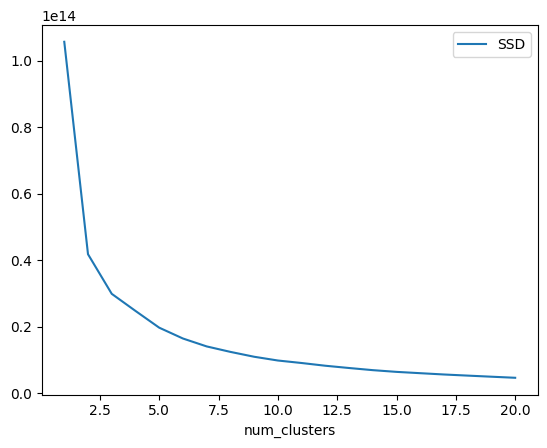

In [131]:
db = pd.DataFrame({'num_clusters': list(range(1, len(SSD)+1)), 'SSD': SSD})
db.plot(x = 'num_clusters', y = 'SSD');

O que foi feito acima é comumente chamado de "método do cotovelo", que consiste em uma maneira de estimar qual é o número correto de cluster (grupos) a ser criados em um modelo de KMeans, ou seja, aquele que melhor corresponde a realidade do nosso projeto, onde o "cotovelo" do gráfico, isso é, o ponto onde ocorre uma mudança brusca nele corresponde ao melhor número de clusters. Pelo gráfico acima, vemos que 3 clusters é o ideal.

In [134]:
cluster_3 = KMeans(n_clusters=3)
predicted_dummy = dummies(predicted)
cluster_3.fit_predict(predicted_dummy)
predicted_dummy['cluster'] = pd.Categorical(cluster_3.labels_)
predicted_dummy.head()

,id,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Driving_License_0,Driving_License_1,Previously_Insured_0,Previously_Insured_1,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,cluster
0,381110,25,11.0,35786.0,152.0,53,0,False,True,False,True,False,True,False,True,False,True,False,1
1,381111,40,28.0,33762.0,7.0,111,1,False,True,False,True,True,False,True,False,False,False,True,1
2,381112,47,28.0,40050.0,124.0,199,1,False,True,False,True,True,False,True,False,False,False,True,1
3,381113,24,27.0,37356.0,152.0,187,0,False,True,False,True,False,True,False,True,False,False,True,1
4,381114,27,28.0,59097.0,152.0,297,0,False,True,False,True,False,True,False,True,False,True,False,1


In [135]:
predicted_dummy['cluster'].value_counts()

,count
cluster,
1,42495
2,42350
0,42192


In [136]:
pd.crosstab(predicted_dummy['cluster'], predicted_dummy['Response'])

Response,0,1
cluster,,
0,21072,21120
1,21328,21167
2,21067,21283


Agora que já criamos os agrupamentos iremos analisar o perfil de cada grupo com relação as variáveis do nosso dataframe, para isso, iremos usar o método grouoby para analisar cada variável em relação a cada grupo.

- Começando nossa análise com o sexo dos clientes, vemos que em todos os 3 clusters, a distribuição é bastante semelhante, sendo que o número de homens é quase o dobro do número de mulheres, tanto para os interesados quanto para os não interessados no seguro.

In [137]:
predicted_dummy.groupby(['cluster', 'Response'])[['Gender_Male','Gender_Female', ]].describe()

<ipython-input-137-5c75f911a685>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  predicted_dummy.groupby(['cluster', 'Response'])[['Gender_Male','Gender_Female', ]].describe()


Gender_Male                      Gender_Female                \
                       count unique    top   freq         count unique    top   
cluster Response                                                                
0       0              21072      2  False  10747         21072      2   True   
        1              21120      2   True  12344         21120      2  False   
1       0              21328      2  False  10888         21328      2   True   
        1              21167      2   True  12399         21167      2  False   
2       0              21067      2  False  10836         21067      2   True   
        1              21283      2   True  12497         21283      2  False   

                         
                   freq  
cluster Response         
0       0         10747  
        1         12344  
1       0         10888  
        1         12399  
2       0         10836  
        1         12497

- Analisando agora a distribuição da idade, vemos que em todos os clusters a idade mediana daqueles que estão dispostos a adquirir o seguro veicular é consideravelmente maior daqueles que não estão dispostos, isso indica que o público alvo mais velho é mais receptivo a essa proposta.

In [138]:
predicted_dummy.groupby(['cluster', 'Response'])[[ 'Age']].describe()

<ipython-input-138-ca69e931b58a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  predicted_dummy.groupby(['cluster', 'Response'])[[ 'Age']].describe()


Age                                                    
                    count       mean        std   min   25%   50%   75%   max
cluster Response                                                             
0       0         21072.0  34.361143  15.140316  20.0  24.0  27.0  43.0  84.0
        1         21120.0  42.945123  14.453331  20.0  31.0  43.0  52.0  83.0
1       0         21328.0  34.618061  15.262589  20.0  24.0  27.0  44.0  84.0
        1         21167.0  43.118675  14.482803  20.0  32.0  43.0  52.0  85.0
2       0         21067.0  34.382304  15.175302  20.0  24.0  27.0  43.0  84.0
        1         21283.0  43.146455  14.583515  20.0  32.0  43.0  52.0  84.0

- Analisando essa tabela, vemos mais uma vez, que todos os clientes dispostos a adquirir o seguro automotivo, nos três clusters não possuem seguro prévio, sendo este mais um público alvo interessante.

In [139]:
predicted_dummy.groupby(['cluster', 'Response'])[['Previously_Insured_1', 'Vehicle_Age_< 1 Year','Vehicle_Age_1-2 Year','Vehicle_Age_> 2 Years']].describe()

<ipython-input-139-07d7cdc4eab7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  predicted_dummy.groupby(['cluster', 'Response'])[['Previously_Insured_1', 'Vehicle_Age_< 1 Year','Vehicle_Age_1-2 Year','Vehicle_Age_> 2 Years']].describe()


Previously_Insured_1                       \
                                count unique    top   freq   
cluster Response                                             
0       0                       21072      2   True  19397   
        1                       21120      1  False  21120   
1       0                       21328      2   True  19605   
        1                       21167      1  False  21167   
2       0                       21067      2   True  19440   
        1                       21283      1  False  21283   

                 Vehicle_Age_< 1 Year                       \
                                count unique    top   freq   
cluster Response                                             
0       0                       21072      2   True  13526   
        1                       21120      2  False  16258   
1       0                       21328      2   True  13521   
        1                       21167      2  False  16370   
2       0                       21067      2   True  13468   
        1                       21283      2  False  16438   

                 Vehicle_Age_1-2 Year                       \
                                count unique    top   freq   
cluster Response                                             
0       0                       21072      2  False  13531   
        1                       21120      2   True  14510   
1       0                       21328      2  False  13523   
        1                       21167      2   True  14552   
2       0                       21067      2  False  13471   
        1                       21283      2   True  14695   

                 Vehicle_Age_> 2 Years                       
                                 count unique    top   freq  
cluster Response                                             
0       0                        21072      2  False  21067  
        1                        21120      2  False  19372  
1       0                        21328      2  False  21326  
        1                        21167      2  False  19349  
2       0                        21067      2  False  21064  
        1                        21283      2  False  19540

- Aqui vemos que uma quantidade significativa daqueles que estão dispostos a adquirir o seguro veicular não tiveram o veículo danificado antes.

In [140]:
predicted_dummy.groupby(['cluster', 'Response'])[['Vehicle_Damage_Yes']].describe()

<ipython-input-140-0e543345e6ea>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  predicted_dummy.groupby(['cluster', 'Response'])[['Vehicle_Damage_Yes']].describe()


Vehicle_Damage_Yes                     
                              count unique    top   freq
cluster Response                                        
0       0                     21072      2  False  19983
        1                     21120      2   True  20101
1       0                     21328      2  False  20218
        1                     21167      2   True  20148
2       0                     21067      2  False  19967
        1                     21283      2   True  20287

- Por fim, temos uma distribuição relativamente uniforme nas variáveis referentes ao preço anual do seguro e o tempo de fidelidade com a seguradora, sendo que essas não são variáveis interessantes para se realizar previsões.

In [141]:
predicted_dummy.groupby(['cluster', 'Response'])[[ 'Annual_Premium', 'Vintage']].describe()

<ipython-input-141-92cf2fc632a5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  predicted_dummy.groupby(['cluster', 'Response'])[[ 'Annual_Premium', 'Vintage']].describe()


Annual_Premium                                                \
                          count          mean           std     min       25%   
cluster Response                                                                
0       0               21072.0  30256.763050  15414.975349  2630.0  24551.00   
        1               21120.0  30772.083807  17857.329718  2630.0  23993.25   
1       0               21328.0  30345.098978  15907.929981  2630.0  24451.75   
        1               21167.0  30635.532433  17807.356329  2630.0  23847.00   
2       0               21067.0  30289.761903  16391.719559  2630.0  24448.00   
        1               21283.0  30846.460790  18084.063061  2630.0  24261.50   

                                               Vintage                         \
                      50%       75%       max    count        mean        std   
cluster Response                                                                
0       0         30921.5  37934.00  267909.0  21072.0  154.395928  83.434000   
        1         32582.5  40883.50  315565.0  21120.0  154.449100  83.834708   
1       0         30979.0  38155.75  339396.0  21328.0  153.563344  83.619767   
        1         32424.0  40663.00  340439.0  21167.0  154.294893  83.625471   
2       0         30812.0  37983.00  424578.0  21067.0  154.876632  83.868678   
        1         32587.0  40763.00  472042.0  21283.0  154.338815  83.591609   

                                                   
                   min   25%    50%    75%    max  
cluster Response                                   
0       0         10.0  82.0  154.0  227.0  299.0  
        1         10.0  82.0  155.0  227.0  299.0  
1       0         10.0  81.0  153.0  226.0  299.0  
        1         10.0  82.0  154.0  226.0  299.0  
2       0         10.0  82.0  154.0  228.0  299.0  
        1         10.0  83.0  154.0  226.0  299.0

### Conclusões

- O modelo cumpriu com o objetivo desejado, sendo que foi possível prever quais clientes estariam dispostos a adquirir o seguro.
- A divisão destes em grupos ofereceu insights sobre os perfis dos possíveis compradores.
- Tal trabalho poderia perfeitamente ser utilizado para uma possível campanha de lançamento de tal seguro, ou até mesmo verificar se a criação deste novo seguro é economicamente viável.